In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
from manofunkcijos import *

In [ ]:
# df['xai'], df['yai'] = zip(*df.apply(lambda x: grid2geo(x['X'], x['Y']), axis=1))

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import requests

In [5]:
url = 'https://api.meteo.lt/v1/stations'

page = requests.get(url)
status = page.status_code
print(status)

200


In [6]:
r = page.json()
print(r)

[{'code': 'akmenes-ams', 'name': 'Akmenės AMS', 'coordinates': {'latitude': 56.24992, 'longitude': 22.73081}}, {'code': 'alytaus-ams', 'name': 'Alytaus AMS', 'coordinates': {'latitude': 54.412435, 'longitude': 24.063274}}, {'code': 'anyksciu-ams', 'name': 'Anykščių AMS', 'coordinates': {'latitude': 55.51735, 'longitude': 25.1178}}, {'code': 'birstono-ams', 'name': 'Birštono AMS', 'coordinates': {'latitude': 54.603217, 'longitude': 24.035802}}, {'code': 'birzu-ams', 'name': 'Biržų AMS', 'coordinates': {'latitude': 56.193191, 'longitude': 24.774184}}, {'code': 'dotnuvos-ams', 'name': 'Dotnuvos AMS', 'coordinates': {'latitude': 55.395993, 'longitude': 23.866224}}, {'code': 'druskininku-ams', 'name': 'Druskininkų AMS', 'coordinates': {'latitude': 54.018202, 'longitude': 23.980791}}, {'code': 'duksto-ams', 'name': 'Dūkšto AMS', 'coordinates': {'latitude': 55.517856, 'longitude': 26.31614}}, {'code': 'elektrenu-ams', 'name': 'Elektrėnų AMS', 'coordinates': {'latitude': 54.786161, 'longitude'

In [7]:
df = pd.DataFrame(data=r)
df.head(15)

,code,name,coordinates
0,akmenes-ams,Akmenės AMS,"{'latitude': 56.24992, 'longitude': 22.73081}"
1,alytaus-ams,Alytaus AMS,"{'latitude': 54.412435, 'longitude': 24.063274}"
2,anyksciu-ams,Anykščių AMS,"{'latitude': 55.51735, 'longitude': 25.1178}"
3,birstono-ams,Birštono AMS,"{'latitude': 54.603217, 'longitude': 24.035802}"
4,birzu-ams,Biržų AMS,"{'latitude': 56.193191, 'longitude': 24.774184}"
5,dotnuvos-ams,Dotnuvos AMS,"{'latitude': 55.395993, 'longitude': 23.866224}"
6,druskininku-ams,Druskininkų AMS,"{'latitude': 54.018202, 'longitude': 23.980791}"
7,duksto-ams,Dūkšto AMS,"{'latitude': 55.517856, 'longitude': 26.31614}"
8,elektrenu-ams,Elektrėnų AMS,"{'latitude': 54.786161, 'longitude': 24.689854}"
9,jonavos-ams,Jonavos AMS,"{'latitude': 55.06913, 'longitude': 24.277147}"


In [10]:
kodai = list(df['code'])
datos = ['2024-10-05','2024-10-06','2024-10-07']
data = []
Stotis = []
temp = []
# for date in datos:
#     for code in kodai:
        

In [11]:
print(kodai)

['akmenes-ams', 'alytaus-ams', 'anyksciu-ams', 'birstono-ams', 'birzu-ams', 'dotnuvos-ams', 'druskininku-ams', 'duksto-ams', 'elektrenu-ams', 'jonavos-ams', 'joniskio-ams', 'jurbarko-ams', 'kaisiadoriu-ams', 'kalvarijos-ams', 'kauno-ams', 'kazlu-rudos-ams', 'kelmes-ams', 'klaipedos-ams', 'kretingos-ams', 'kupiskio-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams', 'marijampoles-ams', 'mazeikiu-ams', 'moletu-ams', 'nidos-ams', 'pagegiu-ams', 'pakruojo-ams', 'panevezio-ams', 'plunges-ams', 'prienu-ams', 'raseiniu-ams', 'rietavo-ams', 'rokiskio-ams', 'sakiu-ams', 'salcininku-ams', 'seduvos-ams', 'siauliu-ams', 'silutes-ams', 'skuodo-ams', 'svencioniu-ams', 'taurages-ams', 'telsiu-ams', 'traku-ams', 'ukmerges-ams', 'utenos-ams', 'varenos-ams', 'ventes-ams', 'vezaiciu-ams', 'vilniaus-ams', 'zarasu-ams']


In [12]:
# raskite meteo stotelę, kuri užfiksavo didžiausią oro temperatūrą esamuoju metu.
# url1 = f'https://api.meteo.lt/v1/stations/{code}/observations'
# url2 = f'https://api.meteo.lt/v1/stations/{code}/observations/latest'
temps = []
for code in kodai:
    url1 = 'https://api.meteo.lt/v1/stations/'+code+'/observations'
    # print(url1)
    datetime = requests.get(url1).json()['observationsDataRange']['endTimeUtc']
    url2 = 'https://api.meteo.lt/v1/stations/'+code+'/observations/latest'
    # print(url2)
    observations = requests.get(url2).json()['observations']
    for o in observations:
        if datetime == o['observationTimeUtc']:
            temps.append(o['airTemperature'])
    

In [13]:
maxtemp = max(temps)
for c,t in zip(kodai,temps):
    if t == maxtemp:
        print(c,t)

nidos-ams 13.7


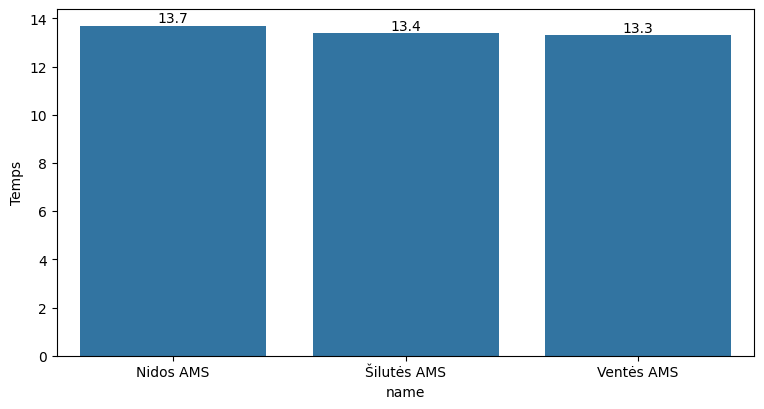

In [14]:
#  antra užduotis : Suraskite tris aukščiausią temperatūrą užfiksavusias stoteles, ir atvaizduokite grafiškai jų fiksuotą oro temperatūrą per paskutines tris dienas.
df['Kodai'] = pd.DataFrame(data=kodai)
df['Temps'] = pd.DataFrame(data= temps)
dfs = df.sort_values(by=['Temps'],ascending=False)[:3]
dfs.head()
fig, axes = plt.subplots(figsize=(9,4.5))
sns.barplot(data=dfs,x=dfs['name'],y=dfs['Temps'])
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [15]:
ncodes = list(dfs['code'])
datos = ['2024-10-05','2024-10-06','2024-10-07']
kodas = []
data = []
temperatura = []
for d in datos:
    for c in ncodes:
        url2 = 'https://api.meteo.lt/v1/stations/'+c+'/observations/'+d
        observations = requests.get(url2).json()['observations']
        for o in observations:
            kodas.append(c)
            data.append(o['observationTimeUtc'])
            temperatura.append(o['airTemperature'])



In [16]:
ndf = pd.DataFrame(data)
ndf['Kodas'] = pd.DataFrame(data=kodas)
ndf['Temperatūros'] = pd.DataFrame(data=temperatura)
ndf['Data'] = pd.DataFrame(data=data)

In [17]:
ndf['Datos'] = pd.to_datetime(ndf['Data'])
ndf['Laikai'] = pd.to_datetime(ndf['Data']).dt.time

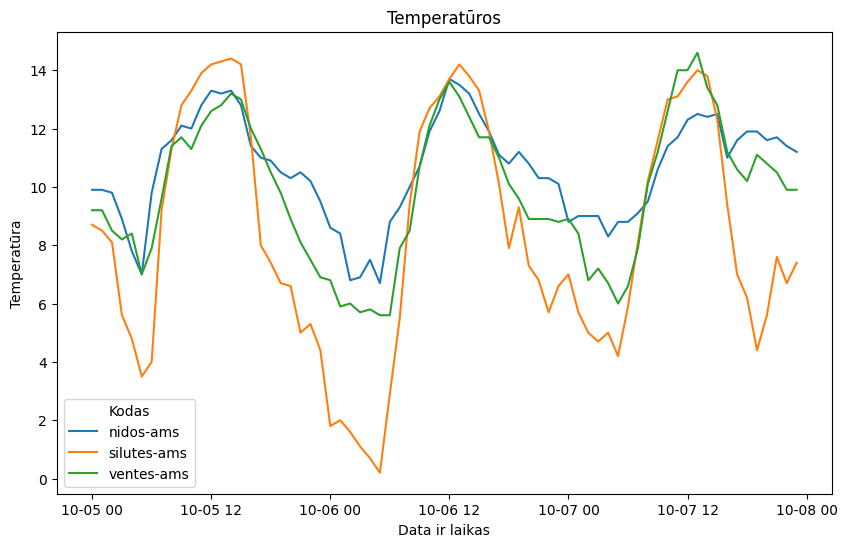

In [18]:
fig, axes = plt.subplots(figsize=(10,6))

axes.set_title('Temperatūros')
ax = sns.lineplot(data=ndf,x = 'Datos', y='Temperatūros', ax=axes, hue='Kodas')
axes.set(xlabel='Data ir laikas',ylabel='Temperatūra')
for container in ax.containers:
    ax.bar_label(container)
plt.show()